# Day 7 - Part 1

In the bag DAG, how many nodes are ancestors of the gold bag node?

In [2]:
rules_str = """light red bags contain 1 bright white bag, 2 muted yellow bags.
dark orange bags contain 3 bright white bags, 4 muted yellow bags.
bright white bags contain 1 shiny gold bag.
muted yellow bags contain 2 shiny gold bags, 9 faded blue bags.
shiny gold bags contain 1 dark olive bag, 2 vibrant plum bags.
dark olive bags contain 3 faded blue bags, 4 dotted black bags.
vibrant plum bags contain 5 faded blue bags, 6 dotted black bags.
faded blue bags contain no other bags.
dotted black bags contain no other bags."""

In [6]:
rules = [r.strip() for r in rules_str.split('.') if r]
rules

['light red bags contain 1 bright white bag, 2 muted yellow bags',
 'dark orange bags contain 3 bright white bags, 4 muted yellow bags',
 'bright white bags contain 1 shiny gold bag',
 'muted yellow bags contain 2 shiny gold bags, 9 faded blue bags',
 'shiny gold bags contain 1 dark olive bag, 2 vibrant plum bags',
 'dark olive bags contain 3 faded blue bags, 4 dotted black bags',
 'vibrant plum bags contain 5 faded blue bags, 6 dotted black bags',
 'faded blue bags contain no other bags',
 'dotted black bags contain no other bags']

In [13]:
def parse_lhs(lhs):
    return ' '.join(lhs.split()[:-1])

def parse_rhs(rhs):
    children = rhs.split(', ')
    coded_rules = []
    for child in children:
        tokens = child.split()
        k, color = tokens[0], ' '.join(tokens[1:-1])
        coded_rules.append({'k':k,'color':color})
    return coded_rules

def parse_rule(rule_str):
    lhs, rhs = rule.split('contain')
    parent_color = parse_lhs(lhs)
    coded_rules = parse_rhs(rhs)
    return parent_color, coded_rules
    
for rule in rules:
    print(rule)
    print(parse_rule(rule))
    print()

light red bags contain 1 bright white bag, 2 muted yellow bags
('light red', [{'k': '1', 'color': 'bright white'}, {'k': '2', 'color': 'muted yellow'}])

dark orange bags contain 3 bright white bags, 4 muted yellow bags
('dark orange', [{'k': '3', 'color': 'bright white'}, {'k': '4', 'color': 'muted yellow'}])

bright white bags contain 1 shiny gold bag
('bright white', [{'k': '1', 'color': 'shiny gold'}])

muted yellow bags contain 2 shiny gold bags, 9 faded blue bags
('muted yellow', [{'k': '2', 'color': 'shiny gold'}, {'k': '9', 'color': 'faded blue'}])

shiny gold bags contain 1 dark olive bag, 2 vibrant plum bags
('shiny gold', [{'k': '1', 'color': 'dark olive'}, {'k': '2', 'color': 'vibrant plum'}])

dark olive bags contain 3 faded blue bags, 4 dotted black bags
('dark olive', [{'k': '3', 'color': 'faded blue'}, {'k': '4', 'color': 'dotted black'}])

vibrant plum bags contain 5 faded blue bags, 6 dotted black bags
('vibrant plum', [{'k': '5', 'color': 'faded blue'}, {'k': '6', 'c

In [14]:
import networkx as nx
from collections import defaultdict

In [19]:
# How many bag colors can eventually contain at least one shiny gold bag?
# >>  At least for part one, don't need to register all combinatorics, just the color relationships

class BagGraphByColors:
    def __init__(self):
        self.g = nx.DiGraph()
        #self.bags_by_color = defaultdict(list)
    def register_rule(self, rule):
        parent, children = rule
        for child in children:
            self.g.add_edge(parent, child['color'])
        
bg = BagGraphByColors()
for rule in rules:
    bg.register_rule( parse_rule(rule) )

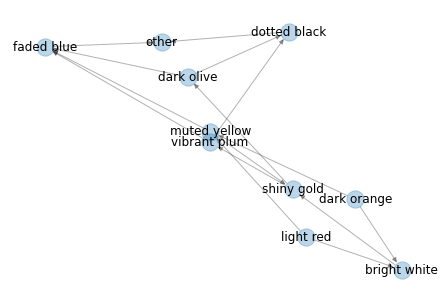

In [26]:
import matplotlib.pyplot as plt

layout = nx.spring_layout(bg.g)
nx.draw(bg.g, pos = layout, alpha = .3)
nx.draw_networkx_labels(bg.g, pos=layout)
plt.show()

In [29]:
from networkx.algorithms.dag import ancestors

queue = ancestors(bg.g, 'shiny gold')
#visited = []

#while queue
#    parent = 
queue

{'bright white', 'dark orange', 'light red', 'muted yellow'}

In [ ]:

        
        
    def _add_node(self, color, k=1):
        assert color not in self.g
        bags_collection = self.bags_by_color[color]
        self.g.add_node(color, k=k)
    def update_color(self, color, k=1):
        if color not in self.g:
            self._add_node(color, k=k)
        else:
            self.g.nodes(data=True)['color']['k'] += k
